<div class="alert alert-block alert-info">

    
# COMPAS Special Tutorial: "Formation channels of Gravitational Waves (GWs)"

### This is a tutorial that can be used for live teaching/demos, it should fill about ~1hr of class
    
In this jupyter notebook we will walk through and re-create some of the figures from https://arxiv.org/pdf/2010.00002.pdf on **Chemically Homogeneous Evolution** by Jeff Riley. A PDF of this paper can be found in the directory under the name CHE_paper.pdf. <br>



Notebook by Floor Broekgaarden, Jeff Riley and Ilya Mandel, originally created for the Saas Fee PhD School <br>
<br>

The original data can be found on Zenodo https://zenodo.org/record/5595426 <br>
For this tutorial we have downloaded COMPAS_Output.h5 from the auhtor's dataset. Note that this data is run with a slightly older version of COMPAS than the most recent COMPAS. 
    
___





<div class="alert alert-block alert-warning">

Throughout this notebook and in class we will use several acronyms and definitions listed below    
    
    
    
### Definitions: 
    
    
 - CHE: Chemically Homogeneous Evolution, 
 - GW: Gravitational Waves 
 - DCO: Double Compact Object 
 - BH: Black Hole
 - NS: Neutron Star
 - Primary: in this notebook always refers to the star that was most massive at the zero age main sequence (ZAMS)
 - Secondary: in this notebook always refers to the star that was least massive at the zero age main sequence (ZAMS)
 - ZAMS: Zero Age Main Sequence: this is in COMPAS where stars start their lives. 
    

In [1]:
# first we will import some of the packages that we will use 
import h5py as h5
import numpy as np
import os
import matplotlib.pyplot as plt

# we will use astropy for some useful constants and units 
from astropy import units as u
from astropy import constants as const
from matplotlib.ticker import (FormatStrFormatter,
                               AutoMinorLocator)
from IPython.display import Image # to open images in Ipython 




In [2]:

# add path to where the COMPASOutput.h5 file is stored. 
# For you the part '~/Downloads/' is probably different
path = '/Users/floorbroekgaarden/Downloads/COMPAS_Output.h5' # change this line! 

# the following line reads in the data 
fdata = h5.File(path, 'r')
list(fdata.keys())  # print the different files within the hdf5 folder: 



# to close the file you will have to use fdata.close()


['CommonEnvelopes', 'DoubleCompactObjects', 'Supernovae', 'SystemParameters']

<div class="alert alert-block alert-success"> 



the files above 'DoubleCompactObjects', 'Supernovae', 'SystemParameters' store the properties of the simulated binaries at the stages of the 'commen enevelope' (in case there is one), the moment of double object formation, the moment of the supernova, and the initial conditions (at the zero-age main sequence).

#### We can view what parameters are stored by again using the command .keys()
    
    
</div>

In [3]:
print(list(fdata['DoubleCompactObjects'].keys()))

print()

print(list(fdata['SystemParameters'].keys()))

print()

print(list(fdata['Supernovae'].keys()))

['Coalescence_Time', 'Eccentricity@DCO', 'MT_Case_1', 'MT_Case_2', 'Mass_1', 'Mass_2', 'Merges_Hubble_Time', 'Recycled_NS_1', 'Recycled_NS_2', 'SEED', 'Separation@DCO', 'Stellar_Type_1', 'Stellar_Type_2', 'Time']

['CE_Alpha', 'CH_on_MS_1', 'CH_on_MS_2', 'Eccentricity@ZAMS', 'Equilibrated', 'Equilibrated_At_Birth', 'Error', 'Experienced_RLOF_1', 'Experienced_RLOF_2', 'Experienced_SN_Type_1', 'Experienced_SN_Type_2', 'LBV_Multiplier', 'LBV_Phase_Flag_1', 'LBV_Phase_Flag_2', 'Mass@ZAMS_1', 'Mass@ZAMS_2', 'Merger', 'Merger_At_Birth', 'Metallicity@ZAMS_1', 'Metallicity@ZAMS_2', 'Omega@ZAMS_1', 'Omega@ZAMS_2', 'SEED', 'SN_Kick_Magnitude_Random_Number_1', 'SN_Kick_Magnitude_Random_Number_2', 'SN_Kick_Mean_Anomaly_1', 'SN_Kick_Mean_Anomaly_2', 'SN_Kick_Phi_1', 'SN_Kick_Phi_2', 'SN_Kick_Theta_1', 'SN_Kick_Theta_2', 'Separation@ZAMS', 'Sigma_Kick_CCSN_BH', 'Sigma_Kick_CCSN_NS', 'Sigma_Kick_ECSN', 'Sigma_Kick_USSN', 'Stellar_Type@ZAMS_1', 'Stellar_Type@ZAMS_2', 'Stellar_Type_1', 'Stellar_Type_2'

<div class="alert alert-block alert-success"> 

#### The meaning of all parameters and files are described here https://compas.readthedocs.io/en/latest/pages/User%20guide/COMPAS%20output/standard-logfiles.html


Now that we have the data, we can do some data investigation. Here is an example of how to read the "SEED" parameter, which is a unique number for each binary that is run. 
    
<div>

In [4]:
SEED_DCO = fdata['DoubleCompactObjects']["SEED"][...].squeeze()
print(SEED_DCO)

[  400047   400065   400101 ... 11599854 11599926 11599965]


<div class="alert alert-block alert-warning">

## Question 1
#### - a: check and write down the number of rows (entries) of each of the dataset groups, 'DoubleCompactObjects', 'Supernovae', 'SystemParameters'. <br>
    
#### - b: If the lengths of the rows are different why is this so? And does it make sense which group has the most/least rows?  <br>

*Hint*: you might want to look at table 1 in the paper CHE_paper.pdf and the descriptions at https://compas.readthedocs.io/en/latest/pages/User%20guide/COMPAS%20output/standard-logfiles.html
    
#### - c: Why is the number of rows in 'DoubleCompactObjects' not the same as the total number of 'BBHs formed' in Table 1 from this paper?

<div class="alert alert-block alert-danger"> 

# Answer 1

<div class="alert alert-block alert-warning">

    
## Example 1: plotting BH masses 
___
below we show an example of how to obtain and plot the compact object masses in the dataset 



In [5]:
# this is just a little function that we will use to make the plot more beautiful (bigger ticks, labels)
# However, you do not have to use this (just uncommoment "layoutAxes" everywhere)

def layoutAxes(ax, nameX='', nameY='', \
               labelSizeMajor = 10, fontsize = 25, second=False, labelpad=None, setMinor=True):
    """
    Tiny code to do the layout for axes in matplotlib
    """
    tickLengthMajor = 10
    tickLengthMinor = 5
    tickWidthMajor  = 1.5
    tickWidthMinor  = 1.5
    
    #rc('axes', linewidth=2)
    #label1 always refers to first axis not the twin 
    if not second:
        for tick in ax.xaxis.get_major_ticks():
            tick.label1.set_fontsize(fontsize)
            #tick.label1.set_fontweight('bold')
        for tick in ax.yaxis.get_major_ticks():
            tick.label1.set_fontsize(fontsize)
            #tick.label1.set_fontweight('bold')
    if second:
        for tick in ax.xaxis.get_major_ticks():
            tick.label2.set_fontsize(fontsize)
            #tick.label1.set_fontweight('bold')
        for tick in ax.yaxis.get_major_ticks():
            tick.label2.set_fontsize(fontsize)
            #tick.label1.set_fontweight('bold')
    for axis in ['top','bottom','left','right']:
        ax.spines[axis].set_linewidth(1.2)
    ax.tick_params(length=tickLengthMajor, width=tickWidthMajor, which='major')
    ax.tick_params(length=tickLengthMinor, width=tickWidthMinor, which='minor')
    ax.set_xlabel(nameX, fontsize=fontsize,labelpad=labelpad)#,fontweight='bold')
    ax.set_ylabel(nameY, fontsize=fontsize,labelpad=labelpad)#, fontweight='bold')    
    
    if setMinor==True:
        # add minor ticks:
        ax.xaxis.set_minor_locator(AutoMinorLocator())
        ax.yaxis.set_minor_locator(AutoMinorLocator())

    return ax



In [6]:
fDCO      = fdata['DoubleCompactObjects']


M1 =  fDCO['Mass_1'][...].squeeze()  # mass in Msun of the compact object resulting from the *primary star*
M2 =  fDCO['Mass_2'][...].squeeze()  # mass in Msun of the compact object resulting from the *secondary star*



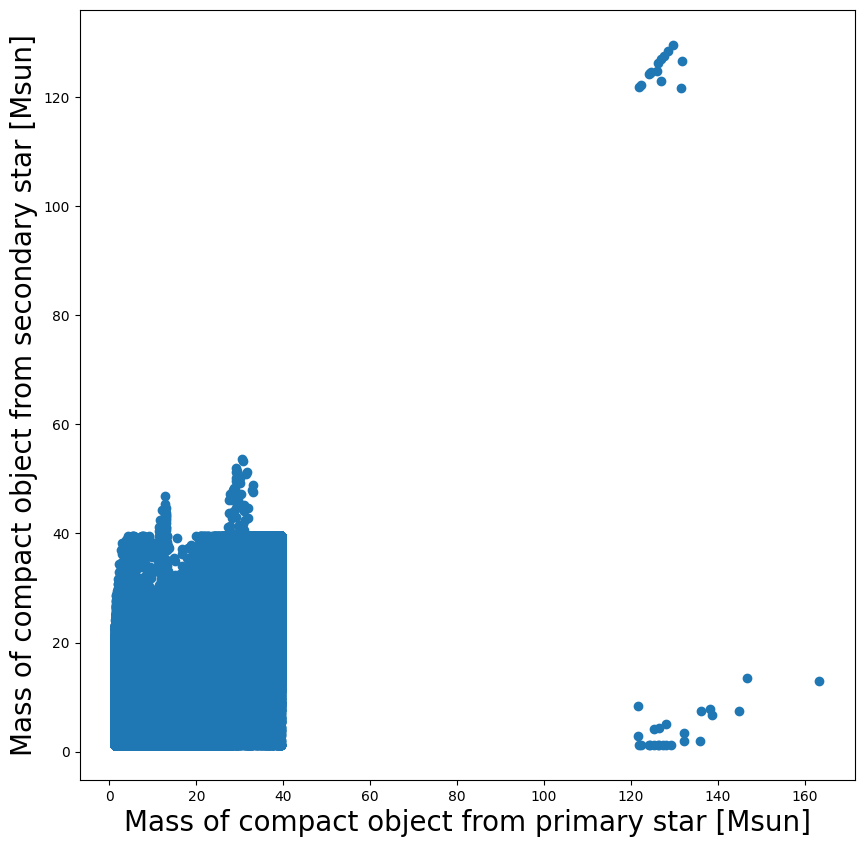

In [7]:
f, ax= plt.subplots(1, 1,  figsize=(10,10)) 

plt.scatter(M1, M2)
plt.xlabel('Mass of compact object from primary star [Msun]', fontsize=20)
plt.ylabel('Mass of compact object from secondary star [Msun]', fontsize=20)
plt.show()

<div class="alert alert-block alert-warning">

### Question 2: 
    
 - a): can you explain some of the features in the plot above? E.g., where are the gaps, where are the most datapoints?
    
    
 - b): Are there any BH+NS or NS+NS in the dataset? If so, plot them
    
    
 - c): extra: how many BH+NS, vs. NS+NS vs. BH-BH systems are there? And what is the total? 

*Hint*: A NS in this COMPAS simulation is defined as a compact object with mass < 2.5 Msun 
                                                                                     
                                                                                     

<div class="alert alert-block alert-danger"> 

# Answer 2

<div class="alert alert-block alert-warning">
    
### Question 3: 
    
    
 - a): Using the parameters in the 'DoubleCompactObjects' dataset and the example above, try to make a scatter plot of Total Mass (M1+M2) versus orbital Period of the BBH systems that merge within a Hubble time (13.7 Gyr) 
    
    Plot the period on the y-axis and the total mass on the x-axis. Plot the period in days. 
    
*Hint: You might want to use Kerpler's III law to complete the function below *
    
    
*Hint:* you will have to select BH+BH systems, and only systems that merge within a Hubble time 

In [8]:

def separation_to_period_circular_case(separation=10*u.AU, M1=1*u.M_sun, M2=1*u.M_sun):
    """calculate Period from separation
    separation is separation of the binary (needs to be given in astropy units)
    M1 and M2 are masses of the binary
    This is based on Kepler's law, using a circular orbit
    
    """
    G = const.G # [g cm s^2]
    
    ## use Kepler;s III law to calculate the period here 
    
    
    
    ###
    
    return period


<div class="alert alert-block alert-danger"> 

# Answer 3

<div class="alert alert-block alert-warning">
    
## Question 4: 
    
    
 - a): Why does the plot that you created look different compared to the figure 6 in https://arxiv.org/pdf/2010.00002.pdf? (you may ignore the metallicity axes) 
    
    
    
 - b): There is a tail of systems at rather large orbital periods that are merging. How is this possible? 

*Hint 4b: plot the eccentricity as a color gradient on the marker using the "c=" option of plt.scatter. 
How is eccentricity imparted to these systems?* 

<div class="alert alert-block alert-danger"> 

# Answer 4

<div class="alert alert-block alert-success"> 
    
## Selecting CHE binaries: 
    
    
 For binaries, Stellar_Type@ZAMS(1) and Stellar_Type@ZAMS(2) will tell you the initial stellar type of each star - type 16 is CH.
CH_on_MS(1) and CH_on_MS(2) are each true if the star remained as CH for the entire MS - they will be false if the star spun down and stopped being CH on the MS.  So any star that was initially CH, and stayed CH on the entire MS is considered to be CHE. We can check which of our binary black holes is a "CHE" by using this information stored in the 'systemParameters' file, and matching it with the double compact object files using the randomSeed.

Note that we also have to remove binaries that merged on the ZAMS as stars, since we are not interested in these
    

In [9]:
fsys      = fdata['SystemParameters']

CH_on_MS_1 =  fsys['CH_on_MS_1'][...].squeeze()  # mass in Msun of the compact object resulting from the primary
CH_on_MS_2 =  fsys['CH_on_MS_2'][...].squeeze()  # mass in Msun of the compact object resulting from the secondary
Stellar_TypeZAMS_1  =  fsys['Stellar_Type@ZAMS_1'][...].squeeze()  # mass in Msun of the compact object resulting from the primary
Stellar_TypeZAMS_2  =  fsys['Stellar_Type@ZAMS_2'][...].squeeze()  # mass in Msun of the compact object resulting from the secondary

# binaries that merge at birth as stars
Merger_At_Birth = fsys['Merger_At_Birth'][...].squeeze()

# SEED of the system Parameters (unique number corresponding to each binary)
SEED = fsys['SEED'][...].squeeze()  # mass in Msun of the compact object resulting from the secondary





In [10]:

# the CHE systems are then selected by systems that are CHE on ZAMS (stellar type 16) AND remain CHE on the MS (main sequence)
# in addition we do not want systems that Merged at Birth 
mask_CHE =  (CH_on_MS_1==1) & (CH_on_MS_2==1) & (Stellar_TypeZAMS_1==16) &  (Stellar_TypeZAMS_2==16) & (Merger_At_Birth==0)

print(np.sum(mask_CHE), 'are CHE out of ', len(mask_CHE), 'systems run')


# let's find the seed of the CHE systems: 
SEED_CHE = SEED[mask_CHE]
print(SEED_CHE)




13644 are CHE out of  12000000 systems run
[  400378   400412   402049 ... 11589507 11589863 11594670]


<div class="alert alert-block alert-success"> 
    
We find 13644 total CHE binaries in our simulation, note that this is the same as the number quoted in the CHE paper under "Both stars remained on the CH" and "Total" in Table 1
    


<div class="alert alert-block alert-warning">
    
## Question 5: 
    
 - a): Using the code above, recreate figure 6 in https://arxiv.org/pdf/2010.00002.pdf? (you may ignore the metallicity axes) 
    
 - b): Explain what you see    
 
#### Hint: A useful line of code is: np.in1d(), below is an example of how it works

In [11]:
# example of np.in1d() function

A = [1,2,3]
B = [1,3,5,7,9]

print(np.in1d(A, B))

[ True False  True]


<div class="alert alert-block alert-danger"> 

# Answer 5

<div class="alert alert-block alert-warning">
    
## Question 6: 
    
 - a): Try to recreeat the figure 4 in https://arxiv.org/pdf/2010.00002.pdf? 
    
    
 - b): Explain what you see 

<div class="alert alert-block alert-danger"> 

# Answer 6

<div class="alert alert-block alert-warning">

    
For the last part of this excersize we will use the code 'FastCosmicIntegrator'. Our goal will be to calculate the merger rate for BBHs, so that we can compare to the analytical estimate we made earlier on.    

## Question 7: 
    
    
Using the code below, plot the merger rate of CHE BBHs as a function of redshift. You should at the end of running this code create a plot with four panels that show the properties of the CHE binaries 
    
 - a) what do the panels show? What are the differences between the panels?   
 - b): please write down the local (z=0) BBH merger rate, and compare this with your analytically calculated rate 
 - c): compare both rates with the other BBH rates as reported in Mandel & Broekgaarden et al. (2021) (Fig 3)

    
 - d): Repeat the excersize above, and answer 7a & 7b above, but now for all BBHs (including non CHE). You can do this by changing dco_type to 'BBH'. What are the differences

    
    
 *Hint* we can do an approximate calculation by combining the Wolf Rayet factors. If you want to do the more expert version you can modify the code in ClassCOMPAS (setCOMPASDCOmask) and add the mask of a specific f_WR factor

In [12]:
!python3 old_FastCosmicIntegration.py \
--dco_type 'CHE_BBH' \
--path '/Users/floorbroekgaarden/Downloads/COMPAS_Output.h5' \
--maxz 15 \
--dontAppend

/Library/Frameworks/Python.framework/Versions/3.11/Resources/Python.app/Contents/MacOS/Python: can't open file '/Users/floorbroekgaarden/Projects/GitHub/COMPAS/utils/Tutorial/Tutorial_reproduce_CHE_paper_teaching_demo_example/FastCosmicIntegration.py': [Errno 2] No such file or directory


In [13]:
!ls 

CHE_evolution_demo.ipynb
CHE_evolution_demo_ANSWERS.ipynb
COMPAS_Documentation.pdf
Rate_Infomu00.035_muz-0.23_alpha0.0_sigma00.39_sigmaz0.0.png
SNR_Grid_IMRPhenomPv2_FD_all_noise.hdf5
__pycache__
old_ClassCOMPAS.py
old_FastCosmicIntegration.py
old_selection_effects.py
old_totalMassEvolvedPerZ.py


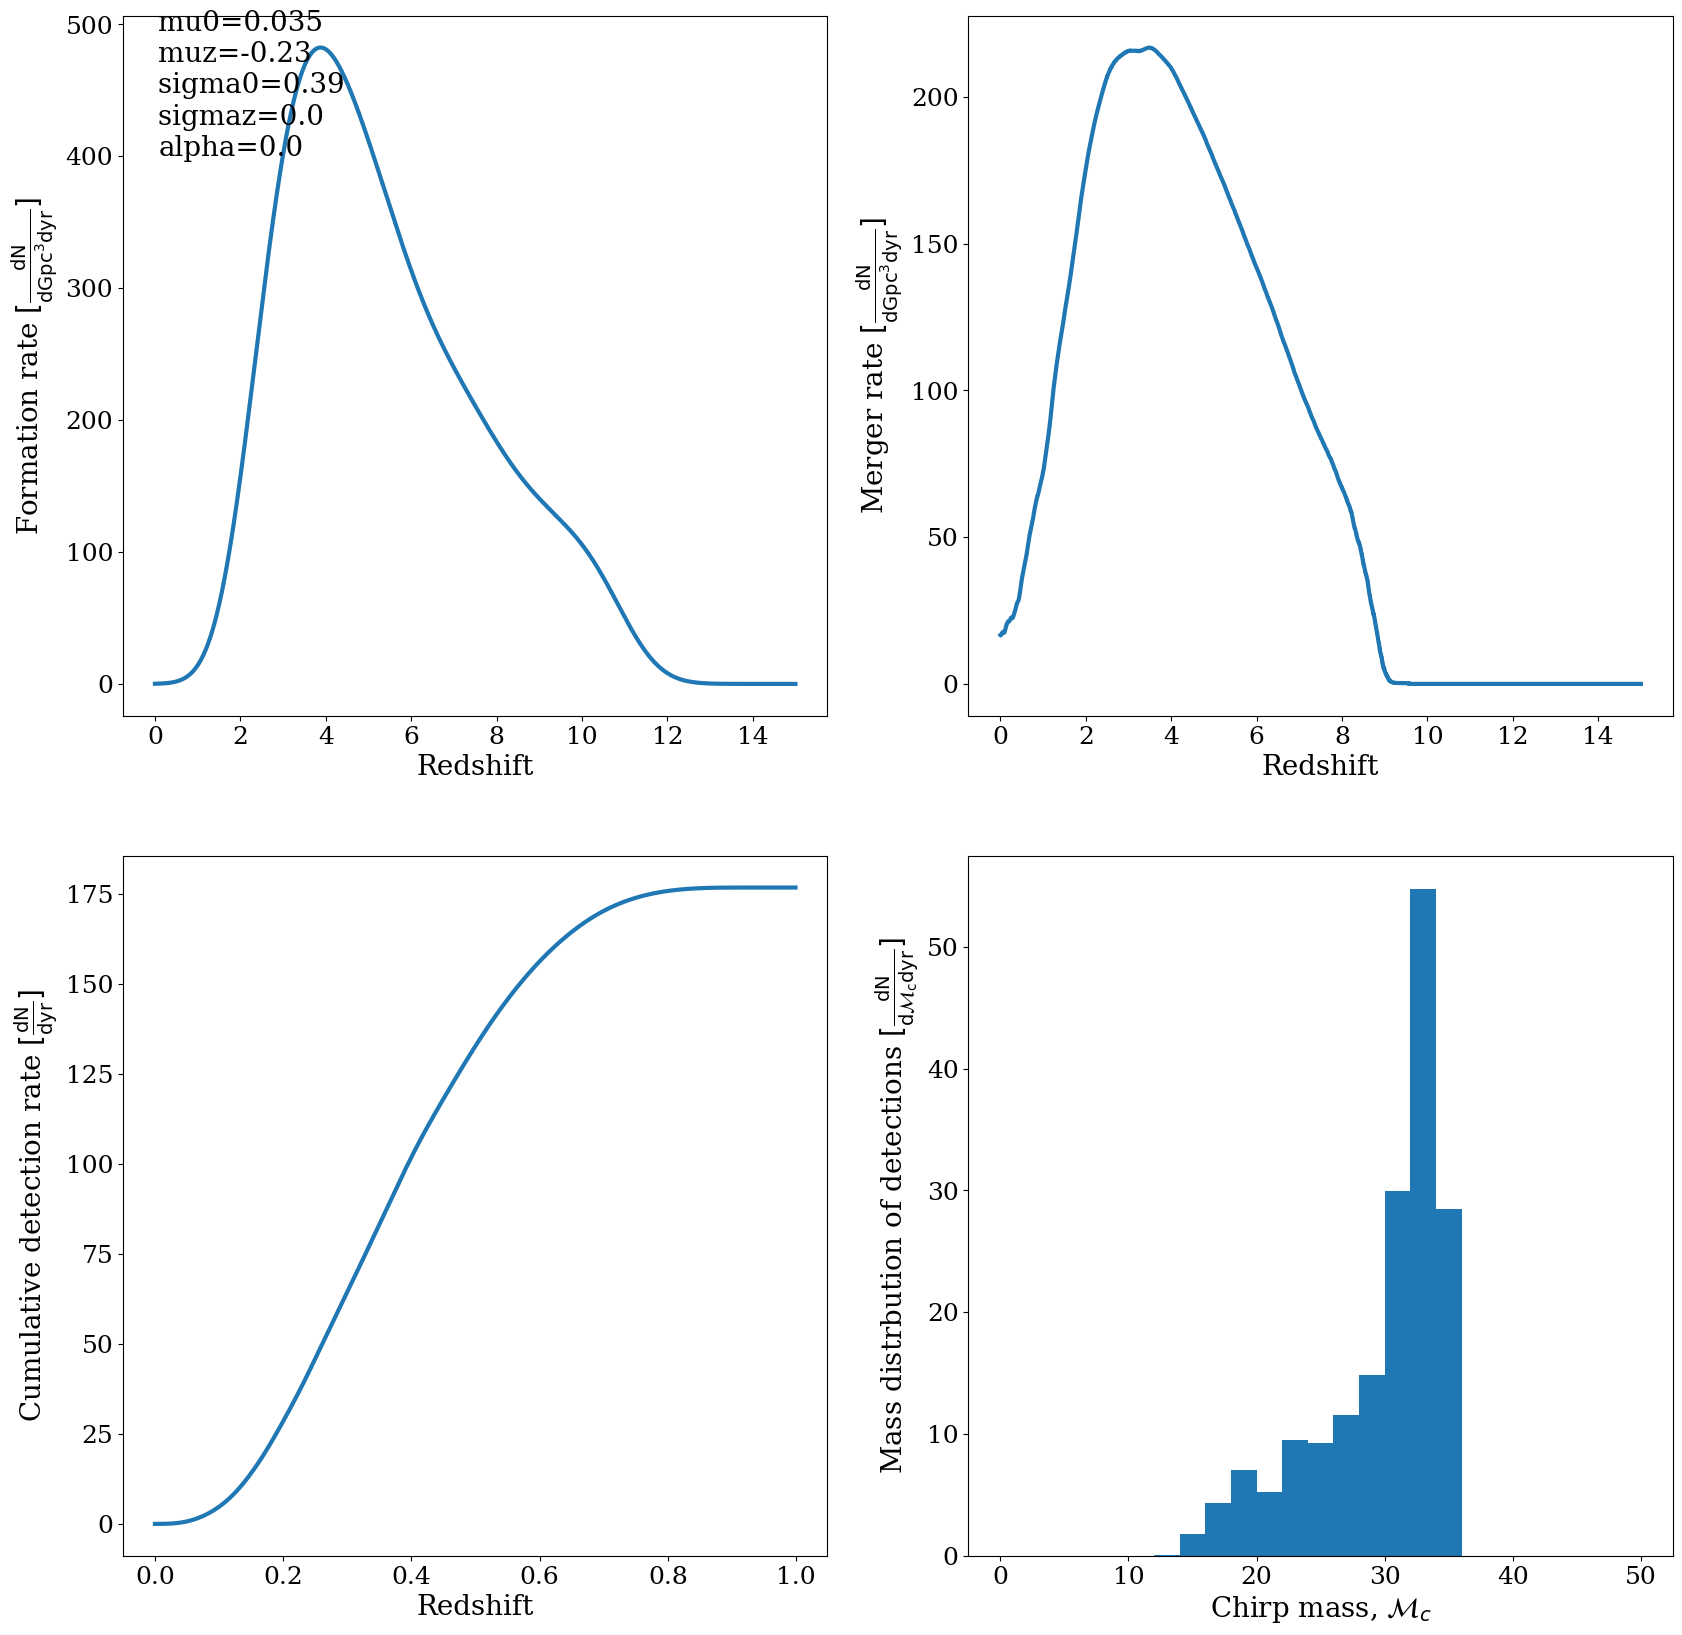

In [14]:
# show the image in the notebook:
Image(filename='./Rate_Infomu00.035_muz-0.23_alpha0.0_sigma00.39_sigmaz0.0.png') 



<div class="alert alert-block alert-danger"> 

# Answer 7
    
    
    
    
    

<div class="alert alert-block alert-warning">

## Extra Question 8: 
    
    
Play around with some of the parameters in the code FastCosmicIntegrater, do the rates go up or down? Is this expected?

<div class="alert alert-block alert-danger"> 

# Answer 8
    
    

 

<div class="alert alert-block alert-warning">

    
   

## EXTRA using the CHE data: 
    
If there is time left, try to plot some other BBH or ZAMS properties of the BBH, (or NSBH or BNS), examples include chirp mass, mass ratio, individual masses. How do these compare with LIGOs observations (paper is attached to this directory)

    
    
    


 <div class="alert alert-block alert-info">
 
 # Extra material:

[//]: ## (grip -b README.md)



# Compact Object Mergers: Population Astrophysics & Statistics

[![Documentation](https://img.shields.io/badge/Documentation-latest-orange.svg?style=flat)](https://github.com/TeamCOMPAS/COMPAS/blob/Documentation/COMPAS_Documentation.pdf)

[//]: ## (Outline features)
COMPAS is a publicly available rapid binary population synthesis code (https://compas.science/) that is designed so that evolution prescriptions and model parameters are easily 
adjustable.  COMPAS draws properties for a binary star system from a set of initial distributions, and evolves it from zero-age main sequence to the end of its life as two compact 
remnants.  It has been used for inference from observations of gravitational-wave mergers, Galactic neutron stars, X-ray binaries, and luminous red novae.

## Documentation
https://compas.science/docs

## Contact
Please email your queries to compas-user@googlegroups.com. You are also welcome to join the [COMPAS User Google Group](https://groups.google.com/forum/#!members/compas-user) to engage in discussions with COMPAS users and developers.






## Example of additional excersizes

If you are interested, you can download the COMPAS code from Github and do any of the following excersizes: 


1). Try to run any of the demos that are provided (I recommend the Chirp mass distribution demo, and/or the detailed evolution demo)

2.) Try to use the code, and the data above, to plot a detailed evolution plot of a CHE BBH. 

3.) Run a larger COMPAS simulation with your own favorite settings, compare this to the data given in this demo. 







